## Section 1: Exploratory Data Analysis (EDA)

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to a pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['TARGET'] = california.target  # Add the target variable (house prices)

# Display the first few rows of the dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Info about the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   TARGET      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


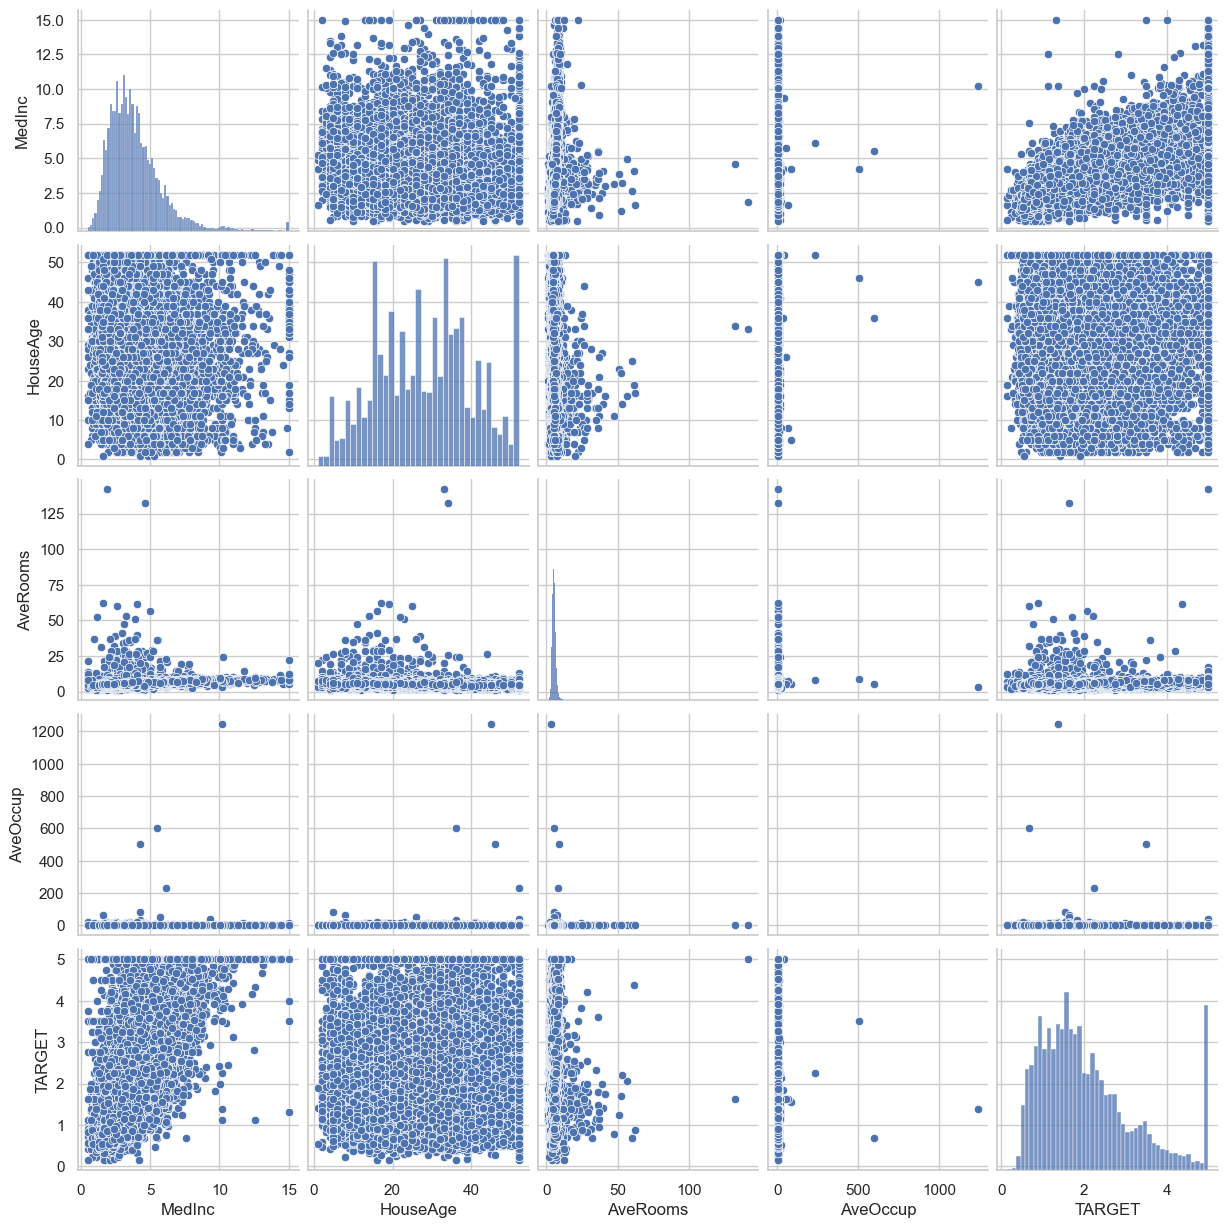

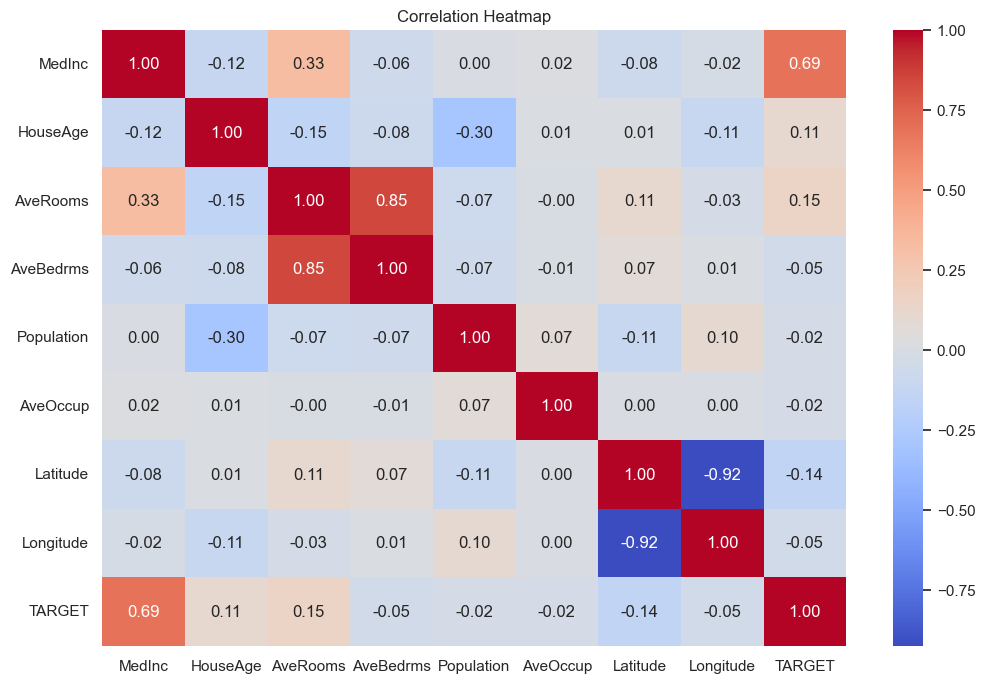

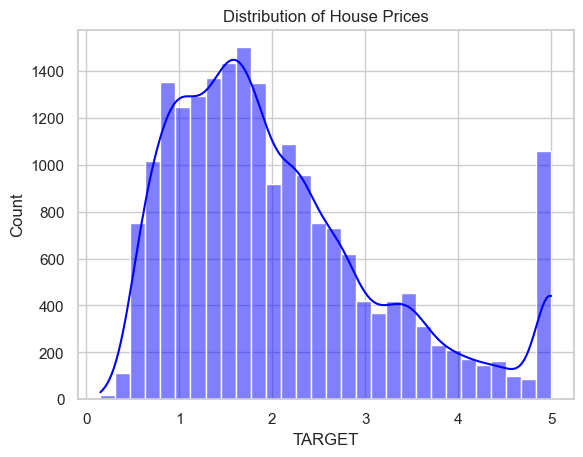

In [23]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Pairplot to visualize relationships between features (you can pick a subset of features)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'TARGET']])

# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target variable (house prices)
sns.histplot(df['TARGET'], kde=True, color='blue', bins=30)
plt.title('Distribution of House Prices')
plt.show()



## Section 2: Data Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler

# Select features (exclude target variable 'TARGET')
X = df.drop(columns=['TARGET'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [26]:
from sklearn.model_selection import train_test_split

# Target variable
y = df['TARGET']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Section 3: Modeling

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 0.7455813830127762
R-squared: 0.575787706032451


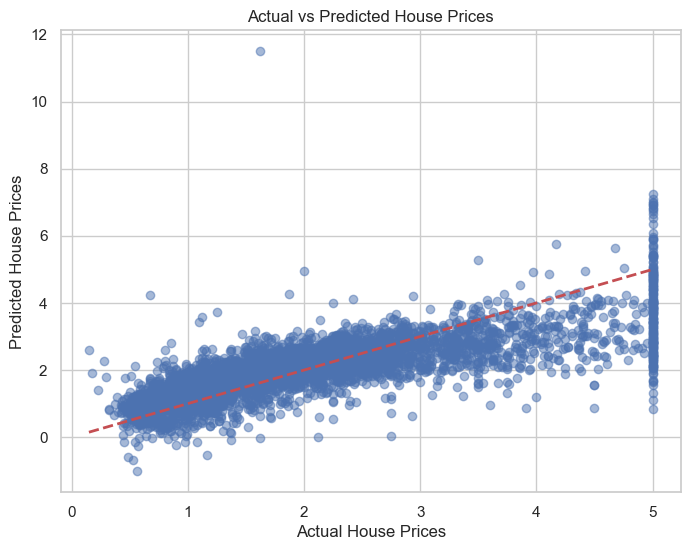

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Section 4: Model Improvement

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_rf_pred)

# Display the results
print(f"Random Forest - RMSE: {rf_rmse}")
print(f"Random Forest - R-squared: {rf_r2}")


Random Forest - RMSE: 0.5058423226213998
Random Forest - R-squared: 0.8047354226018031


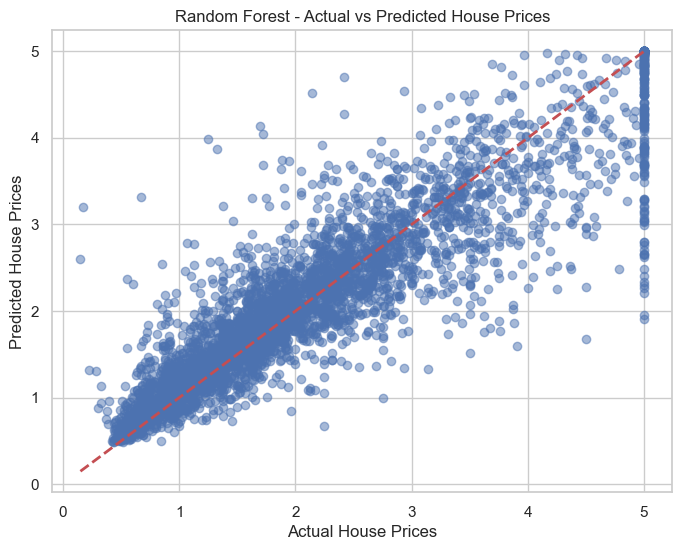

In [33]:
# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Random Forest - Actual vs Predicted House Prices")
plt.show()


### Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_gb_pred = gb_model.predict(X_test)

# Calculate performance metrics
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, y_gb_pred)

# Display the results
print(f"Gradient Boosting - RMSE: {gb_rmse}")
print(f"Gradient Boosting - R-squared: {gb_r2}")


Gradient Boosting - RMSE: 0.5422167577867202
Gradient Boosting - R-squared: 0.7756433164710084


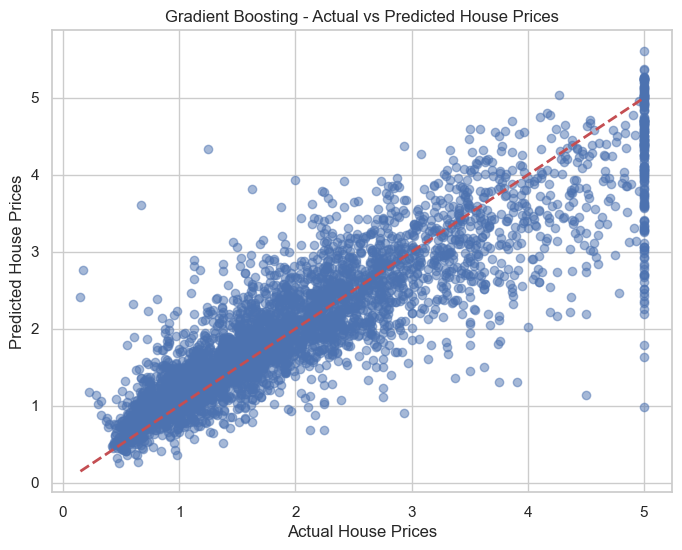

In [36]:
# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_gb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Gradient Boosting - Actual vs Predicted House Prices")
plt.show()


## Section 5: Hyperparameter Tuning

### Random Forest Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")

# Best model
rf_best_model = rf_grid_search.best_estimator_

# Evaluate the tuned model
y_rf_best_pred = rf_best_model.predict(X_test)

# Calculate performance metrics
rf_best_mse = mean_squared_error(y_test, y_rf_best_pred)
rf_best_rmse = np.sqrt(rf_best_mse)
rf_best_r2 = r2_score(y_test, y_rf_best_pred)

print(f"Tuned Random Forest - RMSE: {rf_best_rmse}")
print(f"Tuned Random Forest - R-squared: {rf_best_r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - RMSE: 0.5043780419394601
Tuned Random Forest - R-squared: 0.8058642657255081


### Gradient Boosting Hyperparameter Tuning

In [55]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
gb_grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")

# Best model
gb_best_model = gb_grid_search.best_estimator_

# Evaluate the tuned model
y_gb_best_pred = gb_best_model.predict(X_test)

# Calculate performance metrics
gb_best_mse = mean_squared_error(y_test, y_gb_best_pred)
gb_best_rmse = np.sqrt(gb_best_mse)
gb_best_r2 = r2_score(y_test, y_gb_best_pred)

print(f"Tuned Gradient Boosting - RMSE: {gb_best_rmse}")
print(f"Tuned Gradient Boosting - R-squared: {gb_best_r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Tuned Gradient Boosting - RMSE: 0.4754317817952631
Tuned Gradient Boosting - R-squared: 0.8275077606348136


## Section 6: Save the Model

### Observations
Gradient Boosting is the better model:

It has a lower RMSE (0.4754 vs. 0.5044), indicating smaller prediction errors on average.
Its R² (0.8275) is higher, meaning it explains 82.75% of the variance in the target variable, compared to 80.59% by Random Forest.

In [69]:
# Save the best model (Gradient Boosting)
import joblib
from joblib import dump, load

joblib.dump(gb_best_model, 'best_gb_model.pkl')



['best_gb_model.pkl']